<a href="https://colab.research.google.com/github/amtaylo/Machine-Learning/blob/master/Fraud_Detection_wk3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Packages

In [0]:
import pandas as pd
import numpy as np
import datetime
import math
import seaborn as sns
import yellowbrick as yb
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random

## Import Data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_identity = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Fraud Detection/train_identity.csv")
train_transaction = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Fraud Detection/train_transaction.csv")
test_identity = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Fraud Detection/test_identity.csv")
test_transaction = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Fraud Detection/test_transaction.csv")

In [0]:
# let's combine the data and work with the whole dataset
raw_train_data = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
raw_test_data = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

In [8]:
print(raw_train_data.shape)
raw_train_data.head()

(590540, 434)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [0]:
print(raw_test_data.shape)
raw_test_data.head()

(506691, 433)


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,2635.0,NaN,hotmail.com,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,NaN,136.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,17.0,NaN,gmail.com,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,NaN,242.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,6.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
del train_identity, train_transaction, test_identity, test_transaction

## Data Processing

**Treating Missing Values** <br>
Determine which columns are categorical and numerical <br>
Missing categorical values will get a value of "missing" <br>
Missing numerical values will get a value of -1

In [37]:
raw_train_data_columns = raw_train_data.columns
numericCols = raw_train_data._get_numeric_data().columns
categoricalCols = list(set(raw_train_data_columns) - set(numericCols))
print('The categorical columns in training data are: ',categoricalCols)
raw_train_data[categoricalCols] = raw_train_data[categoricalCols].replace({ np.nan:'missing'})
raw_train_data[numericCols] = raw_train_data[numericCols].replace({ np.nan:-1})

The categorical columns in training data are:  ['id_12', 'DeviceInfo', 'id_15', 'M6', 'M3', 'M4', 'ProductCD', 'id_28', 'DeviceType', 'id_29', 'P_emaildomain', 'M8', 'id_16', 'id_36', 'id_30', 'id_33', 'M9', 'M5', 'id_35', 'R_emaildomain', 'id_38', 'id_23', 'id_37', 'card4', 'id_31', 'card6', 'M7', 'M1', 'id_34', 'M2', 'id_27']


**Compute Correlation between isFraud varible and other numerical variables**

In [0]:
# Compute correlations

def corr_plot(corr):
  # Exclude duplicate correlations by masking uper right values
  mask = np.zeros_like(corr, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True

  # Set background color / chart style
  sns.set_style(style = 'white')

  # Set up  matplotlib figure
  f, ax = plt.subplots(figsize=(11, 9))

  # Add diverging colormap
  cmap = sns.diverging_palette(10, 250, as_cmap=True)

  # Draw correlation plot
  sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)


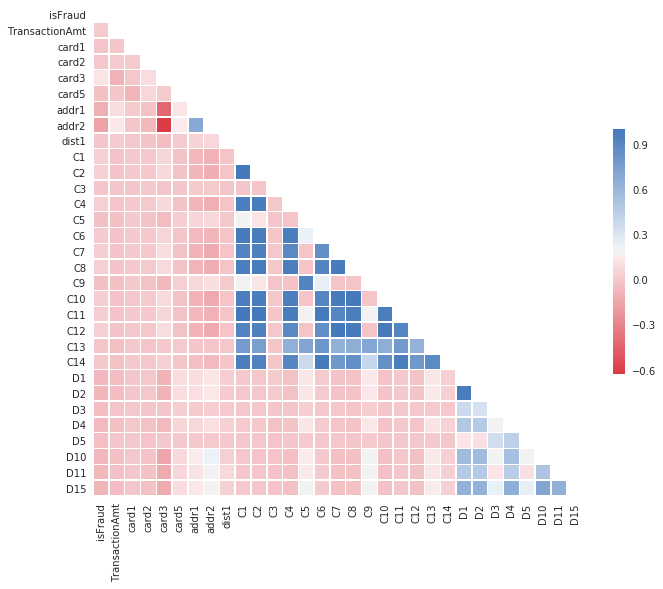

In [0]:
col=['isFraud','TransactionAmt','card1','card2','card3','card5','addr1','addr2','dist1','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','D1','D2','D3','D4','D5','D10','D11','D15']
df = scale(raw_train_data.loc[:,col])
df = pd.DataFrame(df)
df.columns = col
corr_plot(df.corr())

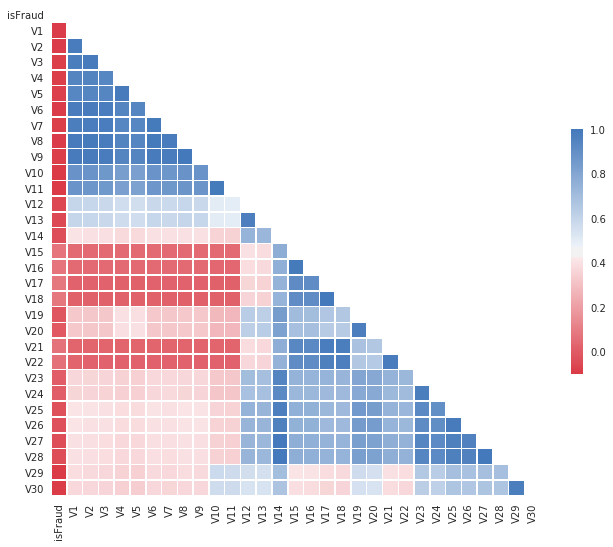

In [0]:
col=['isFraud','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','V29','V30']
df = scale(raw_train_data.loc[:,col])
df = pd.DataFrame(df)
df.columns = col
corr_plot(df.corr())

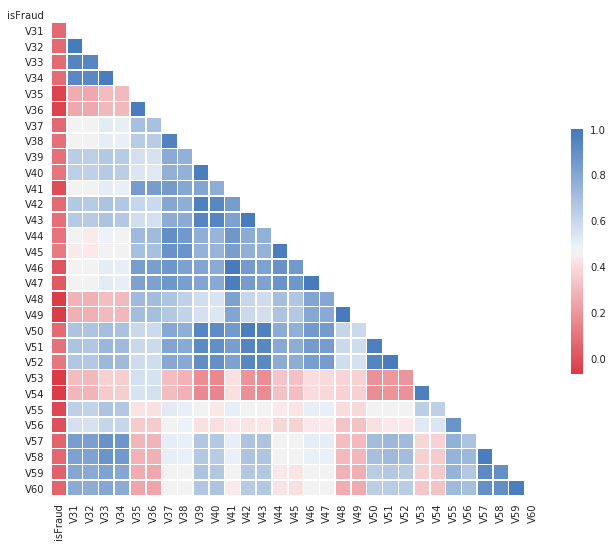

In [0]:
col=['isFraud','V31','V32','V33','V34','V35','V36','V37','V38','V39','V40','V41','V42','V43','V44','V45','V46','V47','V48','V49','V50','V51','V52','V53','V54','V55','V56','V57','V58','V59','V60']
df = scale(raw_train_data.loc[:,col])
df = pd.DataFrame(df)
df.columns = col
corr_plot(df.corr())

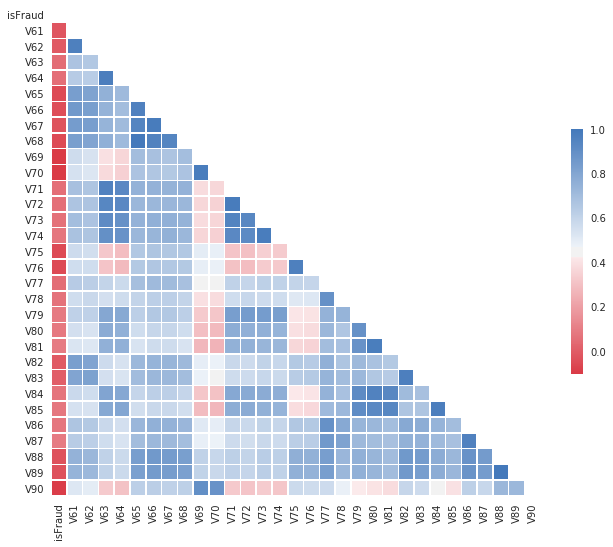

In [0]:
col = ['isFraud','V61','V62','V63','V64','V65','V66','V67','V68','V69','V70','V71','V72','V73','V74','V75','V76','V77','V78','V79','V80','V81','V82','V83','V84','V85','V86','V87','V88','V89','V90']
df = scale(raw_train_data.loc[:,col])
df = pd.DataFrame(df)
df.columns = col
corr_plot(df.corr())

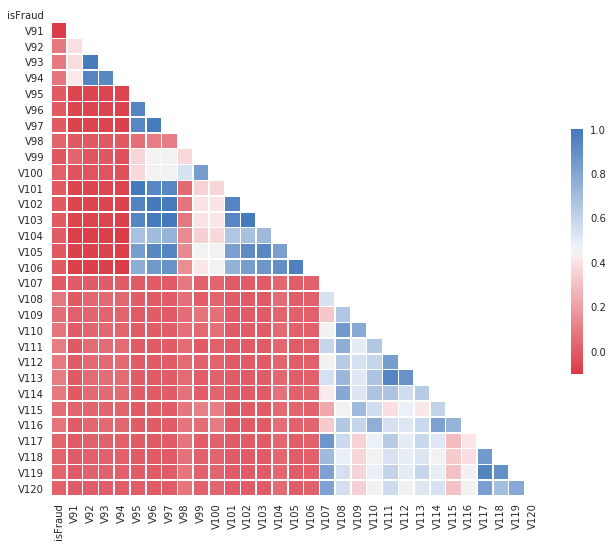

In [0]:
col = ['isFraud','V91','V92','V93','V94','V95','V96','V97','V98','V99','V100','V101','V102','V103','V104','V105','V106','V107','V108','V109','V110','V111','V112','V113','V114','V115','V116','V117','V118','V119','V120']
df = scale(raw_train_data.loc[:,col])
df = pd.DataFrame(df)
df.columns = col
corr_plot(df.corr())

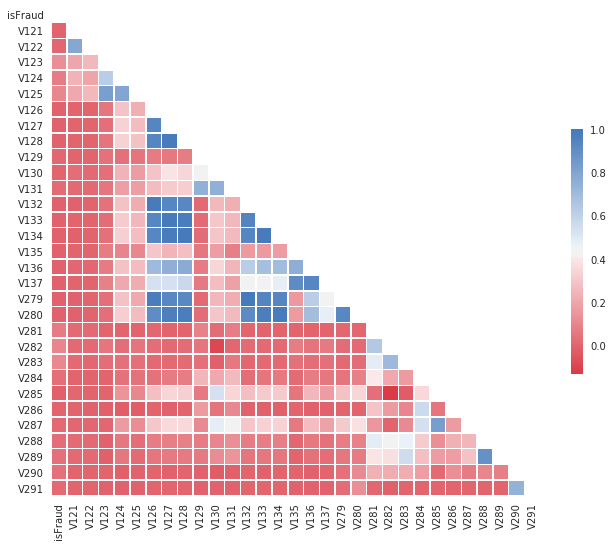

In [0]:
col = ['isFraud','V121','V122','V123','V124','V125','V126','V127','V128','V129','V130','V131','V132','V133','V134','V135','V136','V137','V279','V280','V281','V282','V283','V284','V285','V286','V287','V288','V289','V290','V291']
df = scale(raw_train_data.loc[:,col])
df = pd.DataFrame(df)
df.columns = col
corr_plot(df.corr())

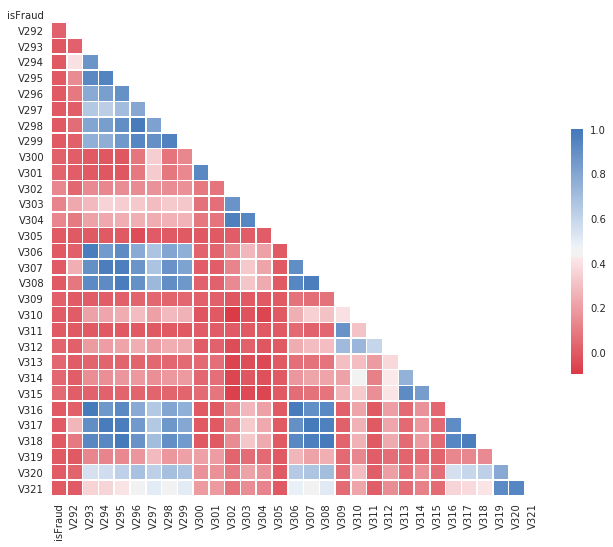

In [0]:
col = ['isFraud','V292','V293','V294','V295','V296','V297','V298','V299','V300','V301','V302','V303','V304','V305','V306','V307','V308','V309','V310','V311','V312','V313','V314','V315','V316','V317','V318','V319','V320','V321']
df = scale(raw_train_data.loc[:,col])
df = pd.DataFrame(df)
df.columns = col
corr_plot(df.corr())

No direct strong correlation between "isfraud" and other raw numerical variables <br>
but strong correlation among some numericals variables <br>
Will remove numerical variables that are highly correlated <br>
Will also remove numerical variables with more than 70% of data missing


In [0]:
variables = list(numericCols)
variables.remove('isFraud')
correlationMatrix = raw_train_data.loc[:, variables].corr().abs()
na_vals = np.sum(raw_train_data.loc[:,variables]==-1)/raw_train_data.shape[0]
goodNumericVars = []
for i_var in variables:    
    if na_vals[i_var] < 0.7:        
        goodNumericVars.append(i_var)
#goodNumericVars.remove('TransactionDT')
goodNumericVars.remove('TransactionID')
corrThresh = 0.9
# Select upper triangle of correlation matrix
upper = correlationMatrix.where(np.triu(np.ones(correlationMatrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > corrThresh)]

In [0]:
for i_var in to_drop:
    if i_var in goodNumericVars:
        goodNumericVars.remove(i_var)

In [42]:
print(goodNumericVars)

['TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'C1', 'C3', 'C5', 'C13', 'D1', 'D3', 'D4', 'D5', 'D10', 'D11', 'D15', 'V1', 'V10', 'V12', 'V14', 'V15', 'V19', 'V29', 'V35', 'V37', 'V39', 'V41', 'V48', 'V53', 'V55', 'V56', 'V61', 'V75', 'V77', 'V78', 'V79', 'V80', 'V82', 'V86', 'V88', 'V95', 'V98', 'V99', 'V100', 'V104', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V114', 'V115', 'V116', 'V117', 'V118', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V129', 'V130', 'V131', 'V135', 'V136', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V300', 'V303', 'V305', 'V310', 'V311', 'V312', 'V313', 'V314', 'V319', 'V320']


Also remove categorical variable with more than 70% missing data

In [0]:
variables = list(categoricalCols)
na_vals = np.sum(raw_train_data.loc[:,variables]=='missing')/raw_train_data.shape[0]
goodCategoricalVars = []
for i_var in variables:    
    if na_vals[i_var] < .7:        
        goodCategoricalVars.append(i_var)

Features from raw data

In [44]:
featuresToUse = goodNumericVars+goodCategoricalVars+['TransactionDT']
train_data = raw_train_data.loc[:,featuresToUse]
target_data = raw_train_data['isFraud']
print(featuresToUse)

['TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'C1', 'C3', 'C5', 'C13', 'D1', 'D3', 'D4', 'D5', 'D10', 'D11', 'D15', 'V1', 'V10', 'V12', 'V14', 'V15', 'V19', 'V29', 'V35', 'V37', 'V39', 'V41', 'V48', 'V53', 'V55', 'V56', 'V61', 'V75', 'V77', 'V78', 'V79', 'V80', 'V82', 'V86', 'V88', 'V95', 'V98', 'V99', 'V100', 'V104', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V114', 'V115', 'V116', 'V117', 'V118', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V129', 'V130', 'V131', 'V135', 'V136', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V300', 'V303', 'V305', 'V310', 'V311', 'V312', 'V313', 'V314', 'V319', 'V320', 'M6', 'M3', 'M4', 'ProductCD', 'P_emaildomain', 'M8', 'M9', 'M5', 'card4', 'card6', 'M7', 'M1', 'M2', 'TransactionDT']


Will create two features the measure time of transaction, hour and day of week

In [0]:
train_data['Transaction_dow'] = np.floor((train_data['TransactionDT'] / (3600 * 24) - 1) % 7)
train_data['Transaction_hour'] = np.floor((train_data['TransactionDT'] / 3600) % 24)

In [20]:
print(train_data.shape)
train_data.head()


(590540, 139)


,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,C1,C3,C5,C13,D1,D3,D4,D5,D10,D11,D15,V1,V10,V12,V14,V15,V19,V29,V35,V37,V39,V41,V48,V53,V55,V56,V61,V75,V77,V78,V79,V80,...,card4,card6,M7,M1,M2,TransactionDT,Transaction_dow,Transaction_hour,TransactionAmt_to_mean_card1,TransactionAmt_to_mean_card4,TransactionAmt_to_mean_card5,TransactionAmt_to_mean_ProductCD,TransactionAmt_to_mean_addr1,TransactionAmt_to_mean_dow,TransactionAmt_to_mean_hour,card1_card2,addr1_dist1,card1_addr1,card1_addr2,card2_addr1,card2_addr2,card4_addr1,card4_addr2,P_emaildomain_addr1,TransactionAmt_to_std_card1,TransactionAmt_to_std_card4,TransactionAmt_to_std_card5,TransactionAmt_to_std_ProductCD,TransactionAmt_to_std_addr1,TransactionAmt_to_std_dow,TransactionAmt_to_std_hour,TransactionAmt_to_mean_C1,TransactionAmt_to_mean_C3,TransactionAmt_to_mean_C5,TransactionAmt_to_mean_C13,TransactionAmt_to_mean_D15,TransactionAmt_to_std_C1,TransactionAmt_to_std_C3,TransactionAmt_to_std_C5,TransactionAmt_to_std_D15
0,68.5,13926,-1.0,150.0,142.0,315.0,87.0,19.0,1.0,0.0,0.0,1.0,14.0,13.0,-1.0,-1.0,13.0,13.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,discover,credit,missing,T,T,86400,0.0,0.0,0.194640,0.257761,0.357614,0.447249,0.509556,0.466299,0.555511,13926_-1.0,315.0_19.0,13926_315.0,13926_87.0,-1.0_315.0,-1.0_87.0,discover_315.0,discover_87.0,missing_315.0,0.184566,0.170233,0.205289,0.254899,0.286941,0.266909,0.328458,0.456542,0.506828,0.583916,0.453921,0.410874,0.243283,0.286055,0.424283,0.196948
1,29.0,2755,404.0,150.0,102.0,325.0,87.0,-1.0,1.0,0.0,0.0,1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,-1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,mastercard,credit,missing,missing,missing,86401,0.0,0.0,0.123777,0.219054,0.135365,0.189346,0.186032,0.197411,0.235180,2755_404.0,325.0_-1.0,2755_325.0,2755_87.0,404.0_325.0,404.0_87.0,mastercard_325.0,mastercard_87.0,gmail.com_325.0,0.062995,0.114212,0.067025,0.107914,0.116132,0.112998,0.139055,0.193281,0.214570,0.247205,0.192171,0.173947,0.102996,0.121103,0.179623,0.083380
2,59.0,4663,490.0,150.0,166.0,330.0,87.0,287.0,1.0,0.0,0.0,1.0,0.0,-1.0,0.0,-1.0,0.0,315.0,315.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,visa,debit,F,T,T,86469,0.0,0.0,0.608150,0.443070,0.602993,0.385222,0.445765,0.401630,0.478469,4663_490.0,330.0_287.0,4663_330.0,4663_87.0,490.0_330.0,490.0_87.0,visa_330.0,visa_87.0,outlook.com_330.0,0.589241,0.258544,0.436054,0.219548,0.254240,0.229892,0.282906,0.393226,0.436538,0.502935,0.390969,0.526529,0.209543,0.246383,0.365441,0.468919
3,50.0,18132,567.0,150.0,117.0,476.0,87.0,-1.0,2.0,0.0,0.0,25.0,112.0,0.0,94.0,0.0,84.0,-1.0,111.0,-1.0,-1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,mastercard,debit,missing,missing,missing,86499,0.0,0.0,0.405133,0.377679,0.399702,0.326459,0.368830,0.340364,0.405483,18132_567.0,476.0_-1.0,18132_476.0,18132_87.0,567.0_476.0,567.0_87.0,mastercard_476.0,mastercard_87.0,yahoo.com_476.0,0.259447,0.196917,0.257152,0.186058,0.235658,0.194824,0.239750,0.369244,0.369947,0.426216,0.463592,0.382986,0.230134,0.208799,0.309696,0.178118
4,50.0,4497,514.0,150.0,102.0,420.0,87.0,-1.0,1.0,0.0,0.0,1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,mastercard,credit,missing,missing,missing,86506,0.0,0.0,0.515612,0.377679,0.233388,0.683340,0.306863,0.340364,0.405483,4497_514.0,420.0_-1.0,4497_420.0,4497_87.0,514.0_420.0,514.0_87.0,mastercard_420.0,mastercard_87.0,gmail.com_420.0,0.882933,0.196917,0.115560,0.807090,0.185845,0.194824,0.239750,0.333243,0.369947,0.426216,0.331330,0.427214,0.177579,0.208799,0.309696,0.330048


In [0]:
for ivar in goodNumericVars:
  train_data[ivar] = scale(train_data[ivar])

In [47]:
train_data.head()

,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,C1,C3,C5,C13,D1,D3,D4,D5,D10,D11,D15,V1,V10,V12,V14,V15,V19,V29,V35,V37,V39,V41,V48,V53,V55,V56,V61,V75,V77,V78,V79,V80,...,V131,V135,V136,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V300,V303,V305,V310,V311,V312,V313,V314,V319,V320,M6,M3,M4,ProductCD,P_emaildomain,M8,M9,M5,card4,card6,M7,M1,M2,TransactionDT,Transaction_dow,Transaction_hour
0,-0.278167,0.821695,-2.199889,-0.2016,-1.256045,0.427399,0.359534,-0.115936,-0.098020,-0.037493,-0.21606,-0.243806,-0.508672,-0.046838,-0.579935,-0.316588,-0.540638,-0.414687,-0.708983,0.947300,0.277503,0.906738,0.385095,0.045617,0.574727,-0.313983,-1.339237,-1.347015,-1.279068,-1.579041,-1.301999,0.879866,0.257203,0.165213,0.553753,0.946002,0.255226,0.170360,0.064794,0.051635,...,-0.193125,-0.058687,-0.0859,-0.166021,0.201935,0.008440,-0.261543,-0.355717,-0.164776,-0.332300,-0.418901,-0.388013,-0.133908,-0.040595,-0.147503,-0.453978,0.003609,-0.334844,-0.041046,-0.227583,-0.222362,-0.249209,-0.055287,-0.088855,T,T,M2,W,missing,missing,missing,F,discover,credit,missing,T,T,86400,0.0,0.0
1,-0.443327,-1.457558,0.288423,-0.2016,-2.155880,0.502744,0.359534,-0.198112,-0.098020,-0.037493,-0.21606,-0.243806,-0.597532,-0.334290,-0.574175,-0.316588,-0.614704,-0.505675,-0.708983,-1.055663,-0.937370,-0.507367,0.385095,0.045617,0.574727,-0.313983,-0.123095,0.443166,0.257477,0.633700,0.016599,-0.520368,0.257203,0.165213,0.553753,-0.427228,0.255226,0.170360,0.064794,0.051635,...,-0.193125,-0.058687,-0.0859,-0.166021,0.201935,0.008440,-0.261543,-0.355717,-0.164776,-0.332300,-0.418901,-0.388013,-0.133908,-0.040595,-0.147503,-0.453978,0.003609,-0.334844,-0.041046,-0.227583,-0.222362,-0.249209,-0.055287,-0.088855,T,missing,M0,W,gmail.com,missing,missing,T,mastercard,credit,missing,missing,missing,86401,0.0,0.0
2,-0.317889,-1.068263,0.816805,-0.2016,-0.716144,0.540416,0.359534,0.985229,-0.098020,-0.037493,-0.21606,-0.243806,-0.597532,-0.334290,-0.574175,-0.316588,-0.614704,1.548062,0.899042,0.947300,0.277503,0.906738,0.385095,0.045617,0.574727,-0.313983,1.093047,0.443166,0.257477,0.633700,0.016599,0.879866,0.257203,0.165213,0.553753,0.946002,0.255226,0.170360,0.064794,0.051635,...,-0.193125,-0.058687,-0.0859,-0.166021,0.201935,0.008440,-0.261543,-0.355717,-0.164776,-0.332300,-0.418901,-0.388013,-0.133908,-0.040595,-0.147503,-0.453978,0.003609,-0.334844,-0.041046,-0.227583,-0.222362,-0.249209,-0.055287,-0.088855,F,T,M0,W,outlook.com,F,F,F,visa,debit,F,T,T,86469,0.0,0.0
3,-0.355521,1.679858,1.289891,-0.2016,-1.818442,1.640451,0.359534,-0.198112,-0.090533,-0.037493,-0.21606,-0.058284,0.113342,-0.313758,-0.032659,-0.301219,-0.136126,-0.505675,-0.142346,-1.055663,-0.937370,0.906738,0.385095,0.045617,0.574727,-0.313983,1.093047,0.443166,0.257477,0.633700,0.016599,0.879866,0.257203,0.165213,0.553753,0.946002,0.255226,0.170360,0.064794,0.051635,...,0.644760,-0.058687,-0.0859,-0.166021,-0.879468,-0.632676,-0.261543,2.690805,-0.164776,3.374835,-0.418901,-0.388013,-0.133908,-0.040595,-0.147503,-0.453978,0.003609,0.668046,-0.041046,0.556724,-0.222362,-0.249209,-0.055287,-0.088855,F,missing,M0,W,yahoo.com,missing,missing,T,mastercard,debit,missing,missing,missing,86499,0.0,0.0
4,-0.355521,-1.102133,0.964260,-0.2016,-2.155880,1.218520,0.359534,-0.198112,-0.098020,-0.037493,-0.21606,-0.243806,-0.597532,-0.334290,-0.579935,-0.316588,-0.620401,-0.505675,-0.714088,-1.055663,-0.937370,-1.921472,-2.599280,-2.005764,-2.177712,-1.815868,-1.339237,-1.347015,-1.279068,-1.579041,-1.301999,-1.920601,-2.285990,-1.954011,-2.153443,-1.800459,-1.981625,-1.729666,-1.797896,-1.743189,...,-0.193125,-0.058687,-0.0859,-0.166021,0.201935,0.008440,-0.261543,-0.355717,-0.164776,-0.332300,-0.418901,-0.388013,-0.133908,-0.040595,-0.147503,1.149541,0.003609,-0.334844,-0.041046,-0.227583,-0.222362,-0.249209,-0.055287,-0.088855,missing,missing,missing,H,gmail.com,missing,missing,missing,mastercard,credit,missing,missing,missing,86506,0.0,0.0


##Process Test Data

In [0]:
raw_test_data = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

In [49]:
transactionID = raw_test_data.loc[:,'TransactionID']
raw_test_data_columns = raw_test_data.columns
numericCols = raw_test_data._get_numeric_data().columns
categoricalCols = list(set(raw_test_data_columns) - set(numericCols))
print('The categorical columns in training data are: ',categoricalCols)
raw_test_data[categoricalCols] = raw_test_data[categoricalCols].replace({ np.nan:'missing'})
raw_test_data[numericCols] = raw_test_data[numericCols].replace({ np.nan:-1})

The categorical columns in training data are:  ['id_12', 'DeviceInfo', 'id_15', 'M6', 'M3', 'M4', 'ProductCD', 'id_28', 'DeviceType', 'id_29', 'P_emaildomain', 'M8', 'id_16', 'id_36', 'id_30', 'id_33', 'M9', 'M5', 'id_35', 'R_emaildomain', 'id_38', 'id_23', 'id_37', 'card4', 'id_31', 'card6', 'M7', 'M1', 'id_34', 'M2', 'id_27']


In [50]:
test_data = raw_test_data.loc[:,featuresToUse]
#test_target_data = raw_test_data.loc[:,'isFraud']
print(test_data.columns)

Index(['TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2',
       'dist1', 'C1', 'C3',
       ...
       'P_emaildomain', 'M8', 'M9', 'M5', 'card4', 'card6', 'M7', 'M1', 'M2',
       'TransactionDT'],
      dtype='object', length=105)


In [0]:
test_data['Transaction_dow'] = np.floor((test_data['TransactionDT'] / (3600 * 24) - 1) % 7)
test_data['Transaction_hour'] = np.floor((test_data['TransactionDT'] / 3600) % 24)

In [0]:
from sklearn.preprocessing import LabelEncoder
for ivar in goodNumericVars:
  test_data[ivar] = scale(test_data[ivar])

for i_cat in goodCategoricalVars:
    le = LabelEncoder()
    curData = pd.concat([train_data.loc[:,i_cat],test_data.loc[:,i_cat]],axis = 0)
    le.fit(curData)
    train_data.loc[:,i_cat] = le.transform(train_data.loc[:,i_cat])   
    test_data.loc[:,i_cat] = le.transform(test_data.loc[:,i_cat])

In [53]:
print(test_data.shape)
test_data.head()

(506691, 107)


,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,C1,C3,C5,C13,D1,D3,D4,D5,D10,D11,D15,V1,V10,V12,V14,V15,V19,V29,V35,V37,V39,V41,V48,V53,V55,V56,V61,V75,V77,V78,V79,V80,...,V131,V135,V136,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V300,V303,V305,V310,V311,V312,V313,V314,V319,V320,M6,M3,M4,ProductCD,P_emaildomain,M8,M9,M5,card4,card6,M7,M1,M2,TransactionDT,Transaction_dow,Transaction_hour
0,-0.418162,0.092483,-1.500597,-0.153105,0.619584,-0.613169,0.393309,-0.169274,-0.051594,-0.120288,-0.077082,0.868656,1.770172,0.111896,1.043937,-0.010564,1.097500,0.265901,0.772544,0.731181,1.293312,-0.951077,0.15999,-0.282735,-1.685175,-0.573847,0.949306,0.155206,-0.137925,0.422969,1.337447,-1.004351,-0.053489,-0.113872,-1.693021,-0.899377,-0.069233,-0.115922,-0.285619,-0.445655,...,-0.076368,-0.036625,-0.049278,-0.133342,-0.690443,-0.628085,-0.262053,-0.055385,-0.161464,-0.376281,-0.383165,-0.361176,-0.177846,-0.110892,-0.124607,-0.5032,0.001948,-0.130576,-0.018518,-0.091377,-0.222817,-0.219775,-0.027623,-0.030916,0,0,3,4,16,1,1,2,4,2,1,1,1,18403224,2.0,0.0
1,-0.348790,-1.163823,-1.500597,-0.153105,0.619584,0.329300,0.393309,-0.154949,-0.089408,-0.120288,-0.194904,-0.154414,0.238746,-0.190739,2.030824,-0.230469,0.314680,2.143920,1.611873,0.731181,0.062557,0.840661,0.15999,-0.282735,0.381915,-0.573847,0.949306,0.155206,-0.137925,0.422969,-0.193175,-1.004351,-0.053489,-0.113872,0.341565,0.891541,-0.069233,-0.115922,-0.285619,-0.445655,...,0.089544,-0.036625,-0.049278,-0.133342,-0.690443,-0.628085,-0.262053,1.045728,-0.161464,0.687309,-0.383165,-0.361176,-0.177846,-0.110892,-0.124607,-0.5032,0.001948,0.251771,-0.018518,0.073275,-0.222817,-0.219775,-0.027623,-0.030916,0,0,0,4,2,2,2,2,4,2,2,1,0,18403263,2.0,0.0
2,0.147589,-1.122062,1.317901,-0.153105,0.619584,1.593232,0.393309,12.407969,-0.102013,-0.120288,-0.194904,-0.055087,0.170682,-0.145344,-0.214762,-0.197483,-0.083009,-0.026041,-0.391326,0.731181,0.062557,0.840661,0.15999,-0.282735,0.381915,-0.573847,0.949306,0.155206,-0.137925,0.422969,-0.193175,-1.004351,-0.053489,-0.113872,0.341565,0.891541,-0.069233,0.716901,-0.285619,-0.445655,...,-0.076368,-0.036625,0.266417,-0.133342,-0.690443,-0.628085,-0.262053,1.045728,-0.161464,-0.376281,-0.383165,-0.361176,-0.177846,0.162859,-0.124607,-0.5032,0.001948,1.533676,-0.018518,-0.091377,-0.222817,-0.219775,-0.027623,0.142690,0,0,0,4,19,0,0,0,4,2,0,1,1,18403310,2.0,0.0
3,0.611216,0.211215,0.015183,-0.153105,-0.725279,-0.357461,0.393309,-0.092875,-0.064198,-0.120288,-0.155630,-0.204078,-0.368153,0.323741,0.391588,0.143370,0.360729,0.435838,0.149575,0.731181,1.293312,0.840661,0.15999,-0.282735,0.381915,1.314042,2.324956,0.988255,-0.137925,0.422969,1.337447,0.777172,-0.053489,-0.113872,0.341565,0.891541,-0.069233,-0.115922,-0.285619,-0.445655,...,-0.076368,-0.036625,-0.049278,-0.133342,0.168592,0.010396,-0.262053,-0.422422,-0.161464,-0.376281,1.829860,1.237133,-0.177846,-0.110892,-0.124607,-0.5032,0.001948,-0.209583,-0.018518,-0.091377,2.778828,1.232996,-0.027623,-0.030916,1,1,3,4,16,2,2,2,4,2,2,1,1,18403310,2.0,0.0
4,-0.271689,1.650123,0.575230,-0.153105,-1.823583,0.073591,0.393309,-0.145399,-0.051594,-0.120288,-0.116356,-0.134549,-0.481592,-0.296662,-0.528391,-0.307436,-0.560235,-0.522780,-0.671102,0.731181,1.293312,0.840661,0.15999,-0.282735,0.381915,1.314042,0.949306,0.155206,-0.137925,0.422969,1.337447,0.777172,-0.053489,-0.113872,0.341565,0.891541,-0.069233,-0.115922,-0.285619,-0.445655,...,0.070044,-0.036625,-0.049278,-0.133342,0.168592,0.010396,2.746715,0.678690,5.111313,0.687309,1.829860,1.237133,-0.177846,-0.110892,-0.124607,-0.5032,0.001948,0.093345,0.225639,0.053923,0.499069,0.725550,-0.027623,-0.030916,0,1,3,4,16,1,1,2,2,2,0,1,1,18403317,2.0,0.0


In [54]:
for ivar in goodNumericVars:
  test_data[ivar] = scale(test_data[ivar])
test_data.head()

,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,C1,C3,C5,C13,D1,D3,D4,D5,D10,D11,D15,V1,V10,V12,V14,V15,V19,V29,V35,V37,V39,V41,V48,V53,V55,V56,V61,V75,V77,V78,V79,V80,...,V131,V135,V136,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V300,V303,V305,V310,V311,V312,V313,V314,V319,V320,M6,M3,M4,ProductCD,P_emaildomain,M8,M9,M5,card4,card6,M7,M1,M2,TransactionDT,Transaction_dow,Transaction_hour
0,-0.418162,0.092483,-1.500597,-0.153105,0.619584,-0.613169,0.393309,-0.169274,-0.051594,-0.120288,-0.077082,0.868656,1.770172,0.111896,1.043937,-0.010564,1.097500,0.265901,0.772544,0.731181,1.293312,-0.951077,0.15999,-0.282735,-1.685175,-0.573847,0.949306,0.155206,-0.137925,0.422969,1.337447,-1.004351,-0.053489,-0.113872,-1.693021,-0.899377,-0.069233,-0.115922,-0.285619,-0.445655,...,-0.076368,-0.036625,-0.049278,-0.133342,-0.690443,-0.628085,-0.262053,-0.055385,-0.161464,-0.376281,-0.383165,-0.361176,-0.177846,-0.110892,-0.124607,-0.5032,0.001948,-0.130576,-0.018518,-0.091377,-0.222817,-0.219775,-0.027623,-0.030916,0,0,3,4,16,1,1,2,4,2,1,1,1,18403224,2.0,0.0
1,-0.348790,-1.163823,-1.500597,-0.153105,0.619584,0.329300,0.393309,-0.154949,-0.089408,-0.120288,-0.194904,-0.154414,0.238746,-0.190739,2.030824,-0.230469,0.314680,2.143920,1.611873,0.731181,0.062557,0.840661,0.15999,-0.282735,0.381915,-0.573847,0.949306,0.155206,-0.137925,0.422969,-0.193175,-1.004351,-0.053489,-0.113872,0.341565,0.891541,-0.069233,-0.115922,-0.285619,-0.445655,...,0.089544,-0.036625,-0.049278,-0.133342,-0.690443,-0.628085,-0.262053,1.045728,-0.161464,0.687309,-0.383165,-0.361176,-0.177846,-0.110892,-0.124607,-0.5032,0.001948,0.251771,-0.018518,0.073275,-0.222817,-0.219775,-0.027623,-0.030916,0,0,0,4,2,2,2,2,4,2,2,1,0,18403263,2.0,0.0
2,0.147589,-1.122062,1.317901,-0.153105,0.619584,1.593232,0.393309,12.407969,-0.102013,-0.120288,-0.194904,-0.055087,0.170682,-0.145344,-0.214762,-0.197483,-0.083009,-0.026041,-0.391326,0.731181,0.062557,0.840661,0.15999,-0.282735,0.381915,-0.573847,0.949306,0.155206,-0.137925,0.422969,-0.193175,-1.004351,-0.053489,-0.113872,0.341565,0.891541,-0.069233,0.716901,-0.285619,-0.445655,...,-0.076368,-0.036625,0.266417,-0.133342,-0.690443,-0.628085,-0.262053,1.045728,-0.161464,-0.376281,-0.383165,-0.361176,-0.177846,0.162859,-0.124607,-0.5032,0.001948,1.533676,-0.018518,-0.091377,-0.222817,-0.219775,-0.027623,0.142690,0,0,0,4,19,0,0,0,4,2,0,1,1,18403310,2.0,0.0
3,0.611216,0.211215,0.015183,-0.153105,-0.725279,-0.357461,0.393309,-0.092875,-0.064198,-0.120288,-0.155630,-0.204078,-0.368153,0.323741,0.391588,0.143370,0.360729,0.435838,0.149575,0.731181,1.293312,0.840661,0.15999,-0.282735,0.381915,1.314042,2.324956,0.988255,-0.137925,0.422969,1.337447,0.777172,-0.053489,-0.113872,0.341565,0.891541,-0.069233,-0.115922,-0.285619,-0.445655,...,-0.076368,-0.036625,-0.049278,-0.133342,0.168592,0.010396,-0.262053,-0.422422,-0.161464,-0.376281,1.829860,1.237133,-0.177846,-0.110892,-0.124607,-0.5032,0.001948,-0.209583,-0.018518,-0.091377,2.778828,1.232996,-0.027623,-0.030916,1,1,3,4,16,2,2,2,4,2,2,1,1,18403310,2.0,0.0
4,-0.271689,1.650123,0.575230,-0.153105,-1.823583,0.073591,0.393309,-0.145399,-0.051594,-0.120288,-0.116356,-0.134549,-0.481592,-0.296662,-0.528391,-0.307436,-0.560235,-0.522780,-0.671102,0.731181,1.293312,0.840661,0.15999,-0.282735,0.381915,1.314042,0.949306,0.155206,-0.137925,0.422969,1.337447,0.777172,-0.053489,-0.113872,0.341565,0.891541,-0.069233,-0.115922,-0.285619,-0.445655,...,0.070044,-0.036625,-0.049278,-0.133342,0.168592,0.010396,2.746715,0.678690,5.111313,0.687309,1.829860,1.237133,-0.177846,-0.110892,-0.124607,-0.5032,0.001948,0.093345,0.225639,0.053923,0.499069,0.725550,-0.027623,-0.030916,0,1,3,4,16,1,1,2,2,2,0,1,1,18403317,2.0,0.0


##Model building and training:<br>
Will use a Light GBM, Light GBM is a gradient boosting framework that uses tree based learning algorithm, to train model <br>

In [55]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size = 0.25)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(442905, 107) (442905,)
(147635, 107) (147635,)


In [0]:
print(len(y_train[y_train==0]),len(y_train[y_train==1]),len(y_train[y_train==0])/len(y_train[y_train==1]))

455924 16508 27.618366852435184


Will need to convert our training data into LightGBM dataset format(this is mandatory for LightGBM training).<br>
After creating a converting dataset, will created a python dictionary with model parameters.

In [0]:
import lightgbm as lgb
x_train_sub=x_train.loc[:,['C1','Transaction_hour','C13','TransactionAmt','card1','card2','P_emaildomain','D15','addr1','D4']]
x_test_sub=x_test.loc[:,['C1','Transaction_hour','C13','TransactionAmt','card1','card2','P_emaildomain','D15','addr1','D4']]
d_train = lgb.Dataset(x_train_sub, label=y_train)
params = {}
#params['learning_rate'] = 0.001
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'auc'
#params['sub_feature'] = 0.5
#params['num_leaves'] = 8
#params['min_child_samples'] =100
#params['max_depth'] = 2
params['scale_pos_weight'] = 10
#params['feature_fraction'] = .5
params['bagging_fraction'] =.5
params['bagging_freq']= 10
#params['lambda_l1']= .1
#params['lambda_l2']= .1
clf = lgb.train(params, d_train, 1500)

##Prediction

In [61]:
#Prediction
y_pred=clf.predict(x_test_sub)

#convert into binary values
for i in range(len(y_pred)):
    if y_pred[i]>=.65:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0

#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)

print(cm)
print(tn, fp, fn, tp)
print(accuracy)

[[141112   1323]
 [  1915   3285]]
141112 1323 1915 3285
0.978067531411928


## Recall and Precision

In [68]:
from sklearn.metrics import recall_score, precision_score
recall = recall_score(y_test, y_pred, average='binary')  
precision = precision_score(y_test, y_pred, average='binary') 
print("Recall: ", round(recall, 2) * 100, "%")
print("Precision: ", round(precision, 2) * 100, "%")


Recall:  63.0 %
Precision:  71.0 %


## Feature Imprtance

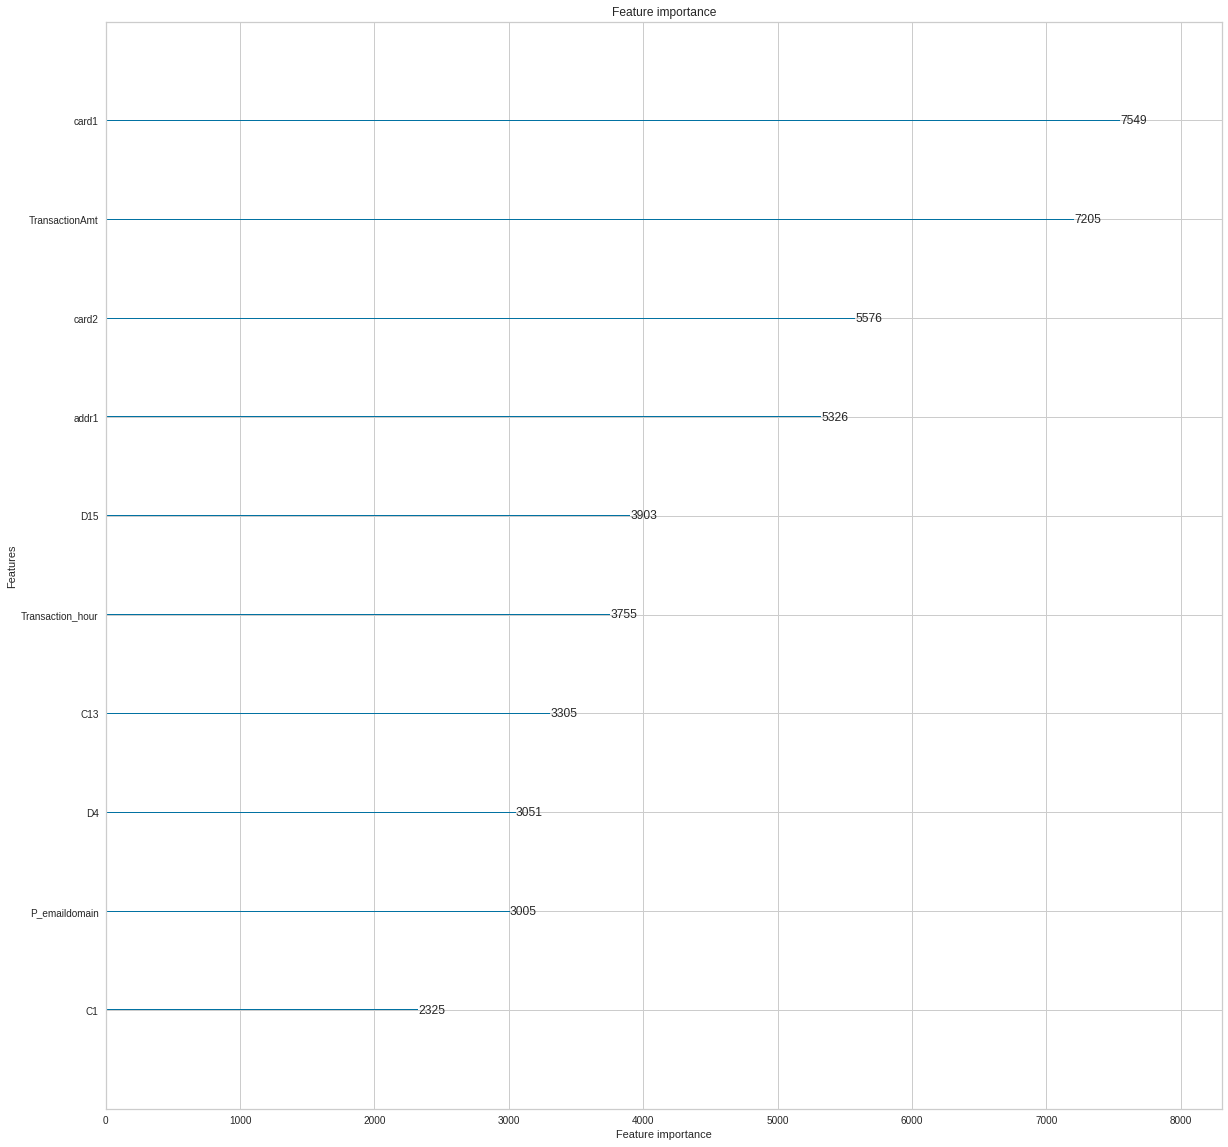

In [62]:
lgb.plot_importance(clf,height=.01,figsize=(20, 20))